In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
import re
import pandas
import matplotlib.pyplot as plt
import numpy as np
import ggplot as gg

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# global MPL settings
# (http://bikulov.org/blog/2013/10/03/creation-of-paper-ready-plots-with-matlotlib/)

def init_plotting():
    plt.rcParams['figure.figsize'] = (15, 9)
    plt.rcParams['font.size'] = 12
#    plt.rcParams['font.family'] = 'Avenir Next'
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['legend.loc'] = 'center left'
    plt.rcParams['axes.linewidth'] = 1

    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')

# init_plotting()

# Limiting chart to where the data is
# plt.ylim(0, 3000)  
# plt.xlim(0, 2200)  
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

colnames = ['author', 'title', 'date' , 'length', 'text']
data = pandas.read_csv('../data/talks-v1b.csv', names=colnames)
texts = data.text.tolist()

# It's entirely possible to convert a column into a list:
# lengths = data.length.tolist()
# but I am experimenting with leaving things in the pandas dataframe.
# The results of most operations, e.g. len(lengths) and len(data.length)
# are the same (2113).

In [3]:
data.head()

,author,title,date,length,text
0,Al Gore,Averting the climate crisis,Jun 2006,957,Thank you so much Chris. And it's truly a gre...
1,David Pogue,Simplicity sells,Jun 2006,1271,Hello voice mail my old friend. I've called f...
2,Cameron Sinclair,My wish: A call for open-source architecture,Jul 2006,1398,I'm going to take you on a journey very quickl...
3,Sergey Brin + Larry Page,The genesis of Google,May 2007,1205,Sergey Brin I want to discuss a question I kn...
4,Nathalie Miebach,Art made of storms,Oct 2011,247,What you just heard are the interactions of ba...


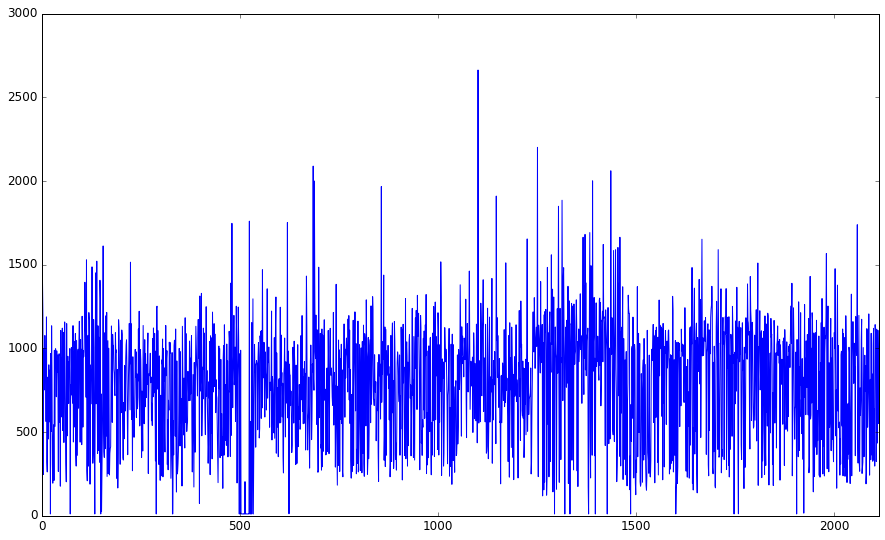

In [45]:
#Simplest solution (but I can't figure out how to sort -- see graph below)
data.length.plot()

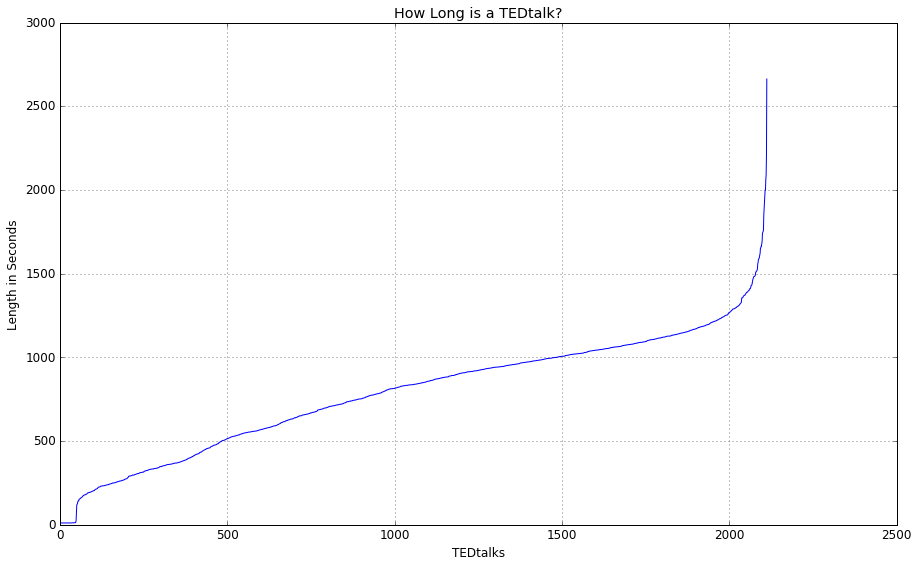

In [46]:
# Sorted graph using MPL
length_sorted = sorted(data.length)
plt.plot(length_sorted)

plt.xlabel('TEDtalks')
plt.ylabel('Length in Seconds')
plt.title('How Long is a TEDtalk?')
plt.grid(True)
plt.show()

In [6]:
# The graph reveals we have a number of items that are, in fact, zero that
# will affect other mathematical operations: mean, median, etc. How many are
# in that flat head and how many in the spiked tail? 
# (See ggplot histogram below.)

print(length_sorted[0:100])
print(length_sorted[-20:])

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 16, 25, 74, 119, 123, 126, 137, 142, 143, 143, 153, 154, 155, 156, 158, 159, 163, 164, 165, 166, 167, 172, 173, 175, 177, 177, 178, 179, 179, 181, 182, 182, 183, 184, 188, 189, 191, 191, 191, 193, 193, 193, 193, 195, 196, 196, 197, 198, 199, 200, 201, 201]
[1652, 1654, 1664, 1664, 1681, 1692, 1739, 1747, 1752, 1760, 1849, 1885, 1910, 1967, 2000, 2001, 2061, 2089, 2201, 2663]


In [9]:
len(re.findall("[a-zA-Z_]+", data.text[0]))

2176

In [ ]:
# First attempt at speed using built-in pandas plotting:
import re
len(re.findall("[a-zA-Z_]+", data.text))/(data.length).plot()

In [25]:
# Problem: some items in list of texts are not strings. 
# We need to get rid of them or replace them:

def xstr(s):
    if s is None:
        return ''
    else:
        return str(s)

# With any luck, this list comprehension will work:
only_texts = [ xstr(text) for text in texts ]

In [24]:
len(only_texts)

2113

In [28]:
# Now will this work?
counts = [len(re.findall("[a-zA-Z_]+", text)) for text in only_texts]

In [29]:
counts[0:5]

[2176, 3417, 3700, 3671, 659]

In [ ]:
# Success with the apparent clean-up: 
# less clear is how to make sure the word count and length of a talk MATCH
# I'm not sure if that's happening here: this should be a unidimensional graph.

wpm = []
for count in counts:
    wpm_ = count / (data.length/60)
    wpm.append(wpm_)

In [36]:
wpm[0][0:5] # reveals that we have 2000 data points for each item in the list. 

0    136.426332
1    102.722266
2     93.390558
3    108.348548
4    528.582996
Name: length, dtype: float64

In [37]:
lengths = data.length / 60

In [38]:
lengths.head()

0    15.950000
1    21.183333
2    23.300000
3    20.083333
4     4.116667
Name: length, dtype: float64

In [39]:
len(lengths)

2113

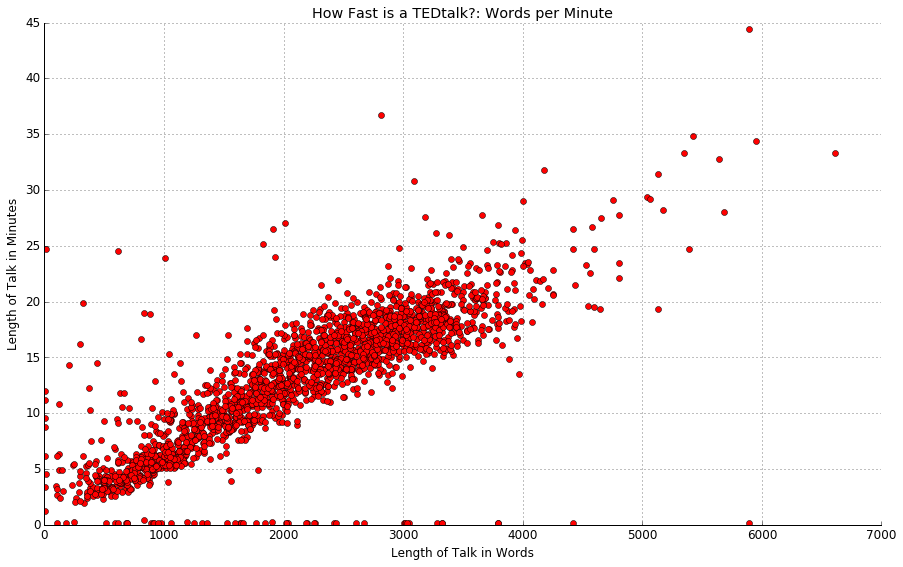

In [44]:
init_plotting()

plt.plot(counts, lengths, 'ro')
plt.xlabel('Length of Talk in Words')
plt.ylabel('Length of Talk in Minutes')
plt.title('How Fast is a TEDtalk?: Words per Minute')
plt.grid(True)
plt.show()

In [ ]:
# Third attempt: add a column with word count into pandas dataframe

# data['word_count'] = data['text'].map(len(re.findall("[a-zA-Z_]+", data.text)))
# data['word_count'] =  data['text'].apply(lambda x: len(re.findall("[a-zA-Z_]+", x)))

word_counts = []
for item in data.text: # data.text = string not list
    wordcount = len(re.findall("[a-zA-Z_]+", item)
#    word_counts.append(wordcount)
    

In [ ]:
word_counts = []
for text in texts:
    count = len(re.findall(r"[a-zA-Z_]+", text))
    word_counts.append(count)

In [ ]:
texts[0].split()[:10]

In [ ]:
type(data.text[0])

In [ ]:
for text in texts[185]:
    print(text.split()[:5])

In [ ]:
def count_words2(cell):
    try:
        len(cell.split())
    except AttributeError:
        return cell

data['word_count'] = data['text'].apply(count_words2)

In [ ]:
data.head()

## Experiments with ggplot

In [ ]:
gg.ggplot(data, gg.aes('length')) + gg.geom_density()

# The resulting graph does seem to represent the frequency of certain lengths
# within the corpus. However, I cannot make sense of the numbers on the Y axis.
# E.g., "0.0000 - 0.0014": possibly percentages? (Check ggplot docs!)

In [ ]:
gg.ggplot(data, gg.aes('length')) + gg.geom_histogram()

In [ ]:
gg.ggplot(data, gg.aes('length')) + gg.geom_point()

In [ ]:
# An early attempt to convert talk lengths from seconds to minutes and 
# seconds -- I think I prefer just dividing by sixty and rounding to a tenth.

def minsecs (seconds):
    m, s = divmod(seconds, 60)
    return m, s

print("{}{}".format(m, s = minsecs(data.length.mean())))

#print("The average talk is {} minutes and {} seconds.".format(minsecs(data.length.mean())))
#print("The median TEDtalk length is {} seconds".format(data.length.median()))

In [ ]:
np.average,
np.median,
np.mode,
np.arange
# average(lengths)
# print("The average talk is {} minutes long.".format(average/60))
mini(lengths)
maxi(lengths)

In [ ]:
data.length.max()

In [ ]:
from statistics import mode

mode(data.length)

In [ ]:
from collections import Counter
counted = Counter(lengths)
counted.most_common()   # Returns all unique items and their counts
counted.most_common(1)  # Returns the highest occurring item

In [ ]:
print(lengths.sort())

In [ ]:
talks = data.text.tolist()
authors = data.author.tolist()
dates = data.date.tolist()

# Combining year with presenter for citation
authordate = [author+" "+year for author, year in zip(authors, years)]

In [ ]:
import ggplot

In [ ]:
# Type-to-Token Ratio (TTR) = crude measure of diversity (stupid at this scope)
lex_diversity = round(len(tt_freq_list) / len(all_words), 4)
print("Lexical diversity: {}".format(lex_diversity))